Saving car data.csv to car data (1).csv
✅ Data loaded successfully.

✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Driven_Kms     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Selling_Type   301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB
None

✅ Nulls:
Year             0
Selling_Price    0
Present_Price    0
Driven_Kms       0
Fuel_Type        0
Selling_Type     0
Transmission     0
Owner            0
dtype: int64

✅ Description:
              Year  Selling_Price  Present_Price     Driven_Kms       Owner
count   301.000000     301.000000   

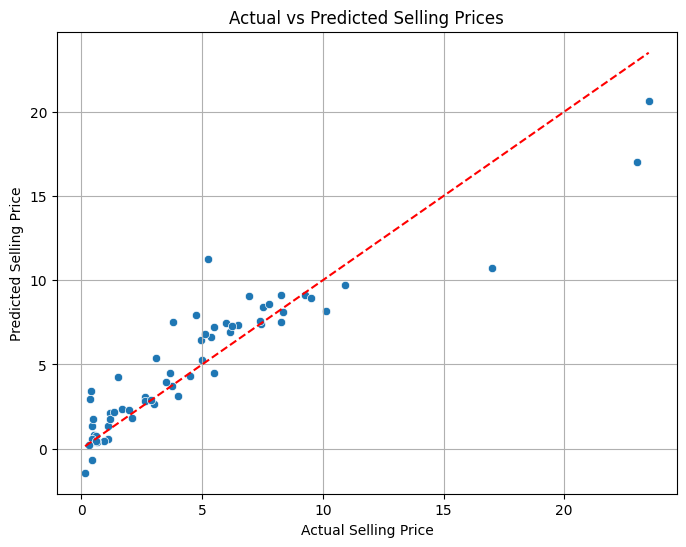

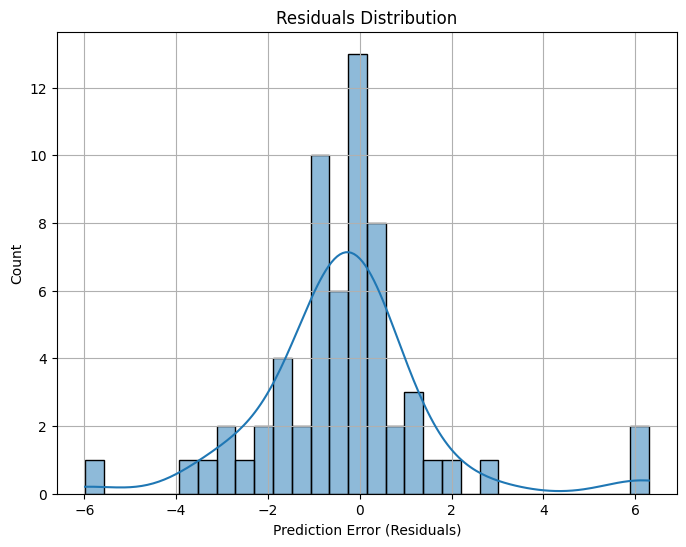

In [1]:
# 🚗 CAR PRICE PREDICTION - MACHINE LEARNING REGRESSION PROJECT

# 1️⃣ IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2️⃣ UPLOAD CSV FILE
from google.colab import files
uploaded = files.upload()

# 3️⃣ LOAD THE DATA
import io
df = pd.read_csv(io.BytesIO(next(iter(uploaded.values()))))
print("✅ Data loaded successfully.")
df.head()

# 4️⃣ DROP UNUSED COLUMNS & RENAME IF NEEDED
df = df.drop(columns=["Car_Name"])
df = df.rename(columns={
    "Driven_kms": "Driven_Kms",
    "Selling_type": "Selling_Type"
})

# 5️⃣ BASIC INFO
print("\n✅ Dataset Info:")
print(df.info())
print("\n✅ Nulls:")
print(df.isnull().sum())
print("\n✅ Description:")
print(df.describe())

# 6️⃣ SPLIT FEATURES AND TARGET
X = df.drop("Selling_Price", axis=1)
y = df["Selling_Price"]

# 7️⃣ SPLIT TRAIN-TEST
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8️⃣ DEFINE COLUMNS FOR PREPROCESSING
numeric_features = ["Year", "Present_Price", "Driven_Kms", "Owner"]
categorical_features = ["Fuel_Type", "Selling_Type", "Transmission"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# 9️⃣ BUILD MODEL PIPELINE
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# 🔟 TRAIN THE MODEL
model.fit(X_train, y_train)
print("\n✅ Model training complete.")

# 🔁 PREDICT
y_pred = model.predict(X_test)

# 🔍 EVALUATION
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluation Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 📈 VISUALIZE ACTUAL vs PREDICTED
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Prices')
plt.grid()
plt.show()

# 📉 RESIDUAL PLOT
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Prediction Error (Residuals)")
plt.title("Residuals Distribution")
plt.grid()
plt.show()
